### Solar Generation Italy 2005

data source: Kaggle

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
df = pd.read_csv('./SolarDataItaly/TimeSeries_TotalSolarGen_and_Load_IT_2015.csv')

In [132]:
df['Time'] = pd.to_datetime(df.utc_timestamp)

In [133]:
all_data = df
all_data['Year'] = all_data.Time.dt.year
all_data['Month'] = all_data.Time.dt.month
all_data['Day'] = all_data.Time.dt.weekday_name
all_data['dayofyear'] = all_data.Time.dt.dayofyear
all_data['hour'] = all_data.Time.dt.hour
all_data['minute'] = all_data.Time.dt.minute
all_data.head()
all_data.set_index('Time', inplace = True)
all_data.drop(df.columns[[0]], axis = 1, inplace = True)

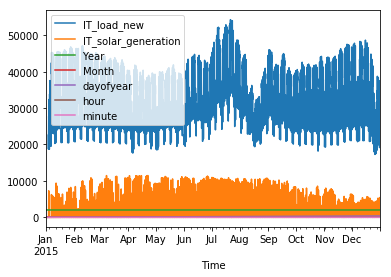

In [134]:
all_data.plot()

In [135]:
all_data.rename(index=str, columns={"IT_solar_generation": "Solar"}, inplace = True)

In [136]:
Jan = all_data[all_data['Month'] == 1]
Feb = all_data[all_data['Month'] == 2] 
Mar = all_data[all_data['Month'] == 3]
Apr = all_data[all_data['Month'] == 4]
May = all_data[all_data['Month'] == 5]
Jun = all_data[all_data['Month'] == 6]
Jul = all_data[all_data['Month'] == 7]
Aug = all_data[all_data['Month'] == 8]
Sep = all_data[all_data['Month'] == 9]
Oct = all_data[all_data['Month'] == 10]
Nov = all_data[all_data['Month'] == 11]
Dec = all_data[all_data['Month'] == 12]

,IT_load_new,Solar,Year,Month,dayofyear,hour,minute
count,649.000000,744.000000,744.0,744.0,744.000000,744.000000,744.0
mean,33714.810478,1096.184140,2015.0,1.0,16.000000,11.500000,0.0
std,8291.990814,2082.825786,0.0,0.0,8.950289,6.926843,0.0
min,18676.000000,0.000000,2015.0,1.0,1.000000,0.000000,0.0
25%,26057.000000,0.000000,2015.0,1.0,8.000000,5.750000,0.0
50%,32961.000000,1.500000,2015.0,1.0,16.000000,11.500000,0.0
75%,42166.000000,1069.000000,2015.0,1.0,24.000000,17.250000,0.0
max,46805.000000,9391.000000,2015.0,1.0,31.000000,23.000000,0.0


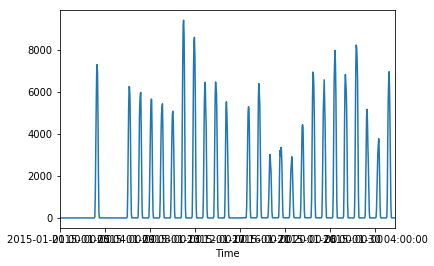

In [137]:
Jan.Solar.plot()
Jan.head()
Jan.describe()

In [138]:
hour_based = all_data
hour_based.set_index('hour', inplace = True)
hour_based.head()
#hourly_use.hist()

,IT_load_new,Solar,Year,Month,Day,dayofyear,minute
hour,,,,,,,
0,NaN,0,2015,1,Thursday,1,0
1,NaN,0,2015,1,Thursday,1,0
2,NaN,0,2015,1,Thursday,1,0
3,NaN,0,2015,1,Thursday,1,0
4,NaN,0,2015,1,Thursday,1,0


In [139]:
hourly_use = hour_based.Solar

## Initial plot of Hourly Use

In this plot, we are looking at the values of solar generation during the day. 
Each curve is represents the solar generation throughout a day. 

This plot shows how peak generation occurs between 9am and 12pm each day; and how generation goes to zero before and after the hours of sunrise and sunset.(as exspected)

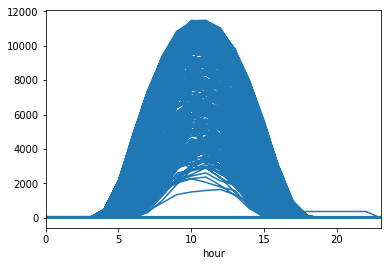

In [141]:
hourly_use.plot()

## Boxplot of use during the Day



{'boxes': [<matplotlib.lines.Line2D at 0x11d40ff28>],
 'caps': [<matplotlib.lines.Line2D at 0x11d413fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11d41fe48>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11d41f8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11d40f588>,
  <matplotlib.lines.Line2D at 0x11d413cc0>]}

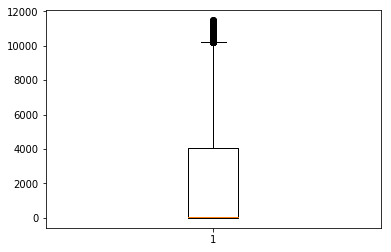

In [143]:
plt.boxplot(hourly_use)

## Histogram of hourly use

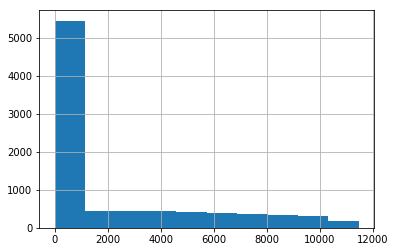

In [144]:
hourly_use.hist()

In [184]:
hourly_actual = []
for i in hourly_use:
    if i > 0:
        hourly_use['above_zero'] = i
    else:
        pass